##### Copyright 2019 The TensorFlow Authors.

In [5]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Convolutional Neural Network (CNN)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

Este tutorial demuestra cómo entrenar una [Red Neuronal Convolucional](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) simple para clasificar [imágenes CIFAR](https://www.cs.toronto.edu/~kriz/cifar.html). Debido a que este tutorial utiliza la [API Secuencial de Keras](https://www.tensorflow.org/guide/keras/overview), crear y entrenar tu modelo tomará solo unas pocas líneas de código.


### Importar TensorFlow

In [6]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#### Descargar y preparar el conjunto de datos CIFAR10

El conjunto de datos CIFAR10 contiene 60,000 imágenes en color divididas en 10 clases, con 6,000 imágenes en cada clase. El conjunto de datos está dividido en 50,000 imágenes de entrenamiento y 10,000 imágenes de prueba. Las clases son mutuamente excluyentes y no hay superposición entre ellas.

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


### Verificar los datos

Para verificar que el conjunto de datos se ve correcto, vamos a graficar las primeras 25 imágenes del conjunto de entrenamiento y mostrar el nombre de la clase debajo de cada imagen:

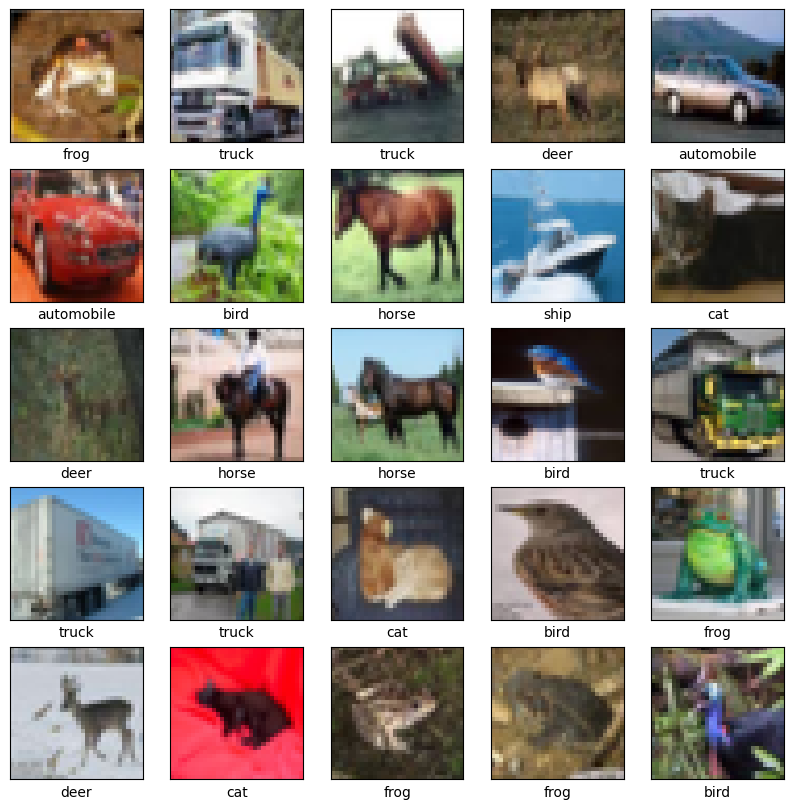

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Crear la base convolucional

Las 6 líneas de código a continuación definen la base convolucional utilizando un patrón común: una pila de capas [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) y [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D).

Como entrada, una CNN toma tensores de forma (image_height, image_width, color_channels), ignorando el tamaño del lote. Si eres nuevo en estas dimensiones, `color_channels` se refiere a (R,G,B). En este ejemplo, configurarás tu CNN para procesar entradas con forma (32, 32, 3), que es el formato de las imágenes CIFAR. Puedes hacer esto pasando el argumento `input_shape` a tu primera capa.


In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Vamos a mostrar la arquitectura de tu modelo hasta ahora:

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

Arriba, puedes ver que la salida de cada capa Conv2D y MaxPooling2D es un tensor 3D con forma (altura, anchura, canales). Las dimensiones de anchura y altura tienden a reducirse a medida que te adentras en la red. El número de canales de salida para cada capa Conv2D se controla mediante el primer argumento (por ejemplo, 32 o 64). Típicamente, a medida que la anchura y la altura se reducen, puedes permitirte (computacionalmente) agregar más canales de salida en cada capa Conv2D.

### Añadir capas Dense en la parte superior

Para completar el modelo, alimentarás el último tensor de salida de la base convolucional (de forma (4, 4, 64)) en una o más capas Dense para realizar la clasificación. Las capas Dense toman vectores como entrada (que son 1D), mientras que la salida actual es un tensor 3D. Primero, aplanarás (o desplegarás) la salida 3D a 1D, y luego añadirás una o más capas Dense en la parte superior. CIFAR tiene 10 clases de salida, por lo que utilizas una última capa Dense con 10 salidas.

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Aquí está la arquitectura completa de tu modelo:

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

El resumen de la red muestra que las salidas de (4, 4, 64) se aplanaron en vectores de forma (1024) antes de pasar por dos capas Dense.

### Compilar y entrenar el modelo

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3477 - loss: 1.7609 - val_accuracy: 0.5518 - val_loss: 1.2448
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5655 - loss: 1.2138 - val_accuracy: 0.6190 - val_loss: 1.0912
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6373 - loss: 1.0256 - val_accuracy: 0.6565 - val_loss: 0.9924
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6789 - loss: 0.9122 - val_accuracy: 0.6711 - val_loss: 0.9334
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7056 - loss: 0.8357 - val_accuracy: 0.6822 - val_loss: 0.9186
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7307 - loss: 0.7671 - val_accuracy: 0.6667 - val_loss: 0.9573
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7510 - loss: 0.7103 - val_accuracy: 0.6934 - val_loss: 0.8843
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7622 - loss: 0.6694 -

### Evaluar el modelo

313/313 - 0s - 2ms/step - accuracy: 0.6991 - loss: 0.9144


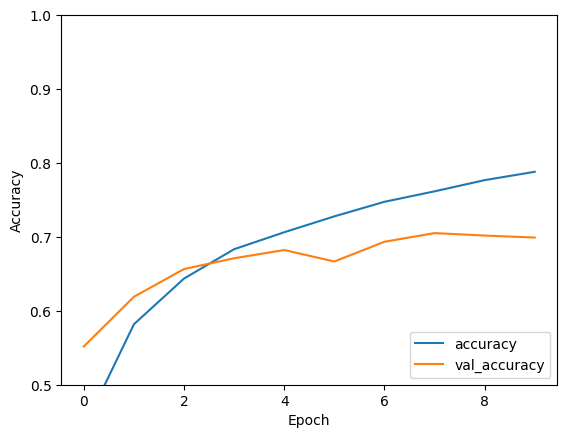

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [15]:
print(test_acc)

0.6991000175476074


Tu CNN simple ha alcanzado una precisión en el conjunto de prueba de más del 70%. ¡Nada mal para unas pocas líneas de código! Para otro estilo de CNN, consulta el [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced), un ejemplo que utiliza la API de subclases de Keras y `tf.GradientTape`.

 Agregar más capas convolucionales:

In [23]:
# Modificar el modelo
modified_model = models.Sequential()
modified_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # Aumentar filtros
modified_model.add(layers.MaxPooling2D((2, 2)))
modified_model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # Más filtros
modified_model.add(layers.MaxPooling2D((2, 2)))
modified_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
modified_model.add(layers.Conv2D(256, (3, 3), activation='relu'))  # Capa convolucional adicional
modified_model.add(layers.MaxPooling2D((2, 2)))


Agregar más capas convolucionales puede ayudar al modelo a aprender características más complejas de las imágenes. Sin embargo, también puede aumentar el tiempo de entrenamiento y el riesgo de sobreajuste.

Los filtros más grandes pueden capturar características más globales, mientras que los filtros más pequeños pueden capturar detalles más finos.

In [24]:
modified_model.add(layers.Flatten())
modified_model.add(layers.Dense(128, activation='relu'))  # Nueva capa Dense
modified_model.add(layers.Dense(64, activation='relu'))
modified_model.add(layers.Dense(10))

Agregar más capas Dense puede aumentar la capacidad del modelo para aprender representaciones complejas. Sin embargo, también puede aumentar el riesgo de sobreajuste.

Modificar los hiperparámetros del modelo:

In [25]:
modified_model.compile(optimizer='rmsprop',  # Cambiar a rmsprop
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                       metrics=['accuracy'])

# Entrenar el modelo modificado
modified_history = modified_model.fit(train_images, train_labels, epochs=20,
                                      validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3130 - loss: 1.8414 - val_accuracy: 0.5593 - val_loss: 1.2302
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.5951 - loss: 1.1620 - val_accuracy: 0.6360 - val_loss: 1.0838
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6799 - loss: 0.9242 - val_accuracy: 0.6792 - val_loss: 0.9465
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7278 - loss: 0.7899 - val_accuracy: 0.6683 - val_loss: 0.9817
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7557 - loss: 0.7252 - val_accuracy: 0.7040 - val_loss: 0.8902
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7777 - loss: 0.6650 - val_accuracy: 0.6536 - val_loss: 1.2102
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7895 - loss: 0.6426 - val_accuracy: 0.7086 - val_loss: 0.9189
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8059 - loss: 0.59

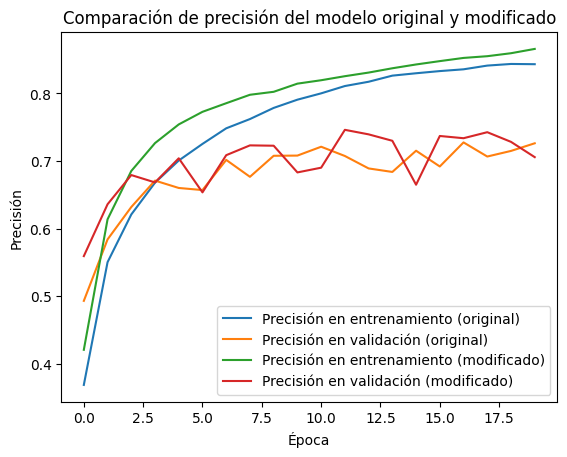

In [26]:
import matplotlib.pyplot as plt

# Graficar precisión
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento (original)')
plt.plot(history.history['val_accuracy'], label='Precisión en validación (original)')
plt.plot(modified_history.history['accuracy'], label='Precisión en entrenamiento (modificado)')
plt.plot(modified_history.history['val_accuracy'], label='Precisión en validación (modificado)')
plt.title('Comparación de precisión del modelo original y modificado')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

In [27]:
_, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)
# Evaluar el modelo modificado
test_loss, test_acc = modified_model.evaluate(test_images, test_labels, verbose=2)
print(f"Precisión en test del modelo modificado: {test_acc}")

313/313 - 1s - 2ms/step - accuracy: 0.7262 - loss: 1.1987
0.7261999845504761
313/313 - 1s - 2ms/step - accuracy: 0.7057 - loss: 1.2285
Precisión en test del modelo modificado: 0.7056999802589417


Explicación de las Modificaciones Realizadas:

Capas Convolucionales:
Se incrementó el número de filtros en las capas convolucionales. La primera capa convolucional pasó de 32 a 64 filtros, y la segunda capa aumentó de 64 a 128 filtros. Además, se añadió una capa convolucional adicional con 256 filtros para capturar más detalles de las imágenes. El objetivo de esta modificación fue permitir que la red aprenda características más complejas de las imágenes.

Capas Dense (Densas):
Se agregó una capa densa adicional de 128 neuronas antes de la capa de salida, lo que aumentó la capacidad del modelo para procesar representaciones más complejas. Este tipo de capas densas ayudan a combinar las características aprendidas en las capas convolucionales para mejorar la clasificación final.

Optimización y Hiperparámetros:
Se cambió el optimizador de adam a rmsprop. El optimizador RMSprop es adecuado para problemas donde hay gradientes fluctuantes, y la modificación fue realizada para observar cómo afectaba al rendimiento general del modelo.
Se incrementó el número de épocas de entrenamiento de 10 a 20, con el fin de dar más oportunidades al modelo para aprender a partir de los datos de entrenamiento.

Conclusiones sobre el Impacto de las Modificaciones:

Precisión en Entrenamiento:

El modelo modificado mostró una mayor precisión en el conjunto de entrenamiento en comparación con el modelo original. Esto es indicativo de que el modelo fue capaz de aprender más características de los datos debido a la mayor complejidad de la arquitectura. La curva de precisión del modelo modificado superó al modelo original, alcanzando casi el 90% al final de las 20 épocas.

Precisión en Validación:

A pesar del aumento en la precisión del entrenamiento, el modelo modificado no mostró una mejora significativa en la precisión del conjunto de validación. En algunos puntos, incluso, la precisión del modelo modificado es inferior a la del modelo original, lo que sugiere un posible sobreajuste. Esto significa que el modelo aprendió características muy específicas del conjunto de entrenamiento que no se generalizan bien al conjunto de prueba.

Evaluación en Conjunto de Prueba:

El modelo original alcanzó una precisión en el conjunto de prueba de 72.62%, mientras que el modelo modificado obtuvo una precisión ligeramente inferior de 70.57%. Esta pequeña reducción en la precisión confirma la tendencia observada en las curvas de validación: el modelo modificado, aunque más complejo, no generaliza mejor que el modelo original.

Conclusión Final:

Las modificaciones, si bien aumentaron la capacidad del modelo para aprender, no necesariamente resultaron en un mejor rendimiento general. El incremento en las capas convolucionales y densas probablemente condujo al sobreajuste, donde el modelo se ajusta demasiado a los datos de entrenamiento pero pierde capacidad para generalizar en datos no vistos. Además, el cambio de optimizador no tuvo un impacto notable en el rendimiento. Estos resultados sugieren que agregar complejidad a la arquitectura del modelo no siempre resulta en mejoras si no se acompaña de técnicas para prevenir el sobreajuste, como la regularización o el uso de dropout.